## 50 STARTUPS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
dataset=pd.read_csv("C:/Users/Thamesh/Downloads/50_startups.csv");
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values


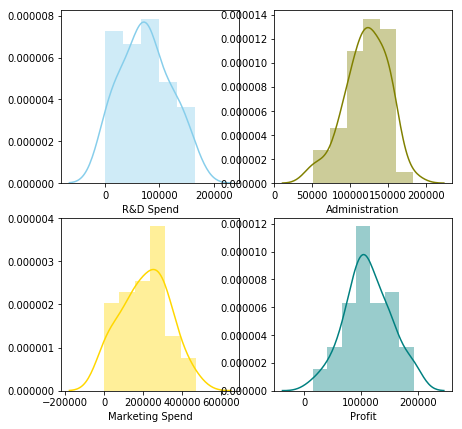

In [6]:
f,axes=plt.subplots(2,2, figsize=(7,7))
sb.distplot(dataset['R&D Spend'],color='skyblue',ax=axes[0,0])
sb.distplot(dataset['Administration'],color='olive',ax=axes[0,1])
sb.distplot(dataset['Marketing Spend'],color='gold',ax=axes[1,0])
sb.distplot(dataset['Profit'],color='teal',ax=axes[1,1])

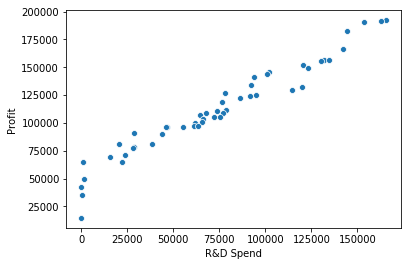

In [7]:
sb.scatterplot(dataset["R&D Spend"],dataset["Profit"])

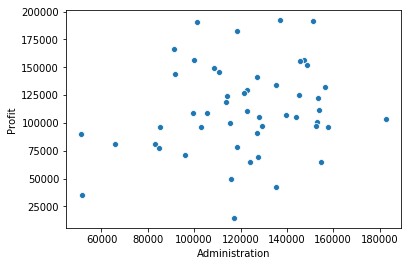

In [8]:
sb.scatterplot(dataset["Administration"],dataset["Profit"])

In [9]:
np.corrcoef(dataset["R&D Spend"],dataset['Profit'])[0,1]

0.9729004656594832

In [10]:
np.corrcoef(dataset["Administration"],dataset['Profit'])[0,1]


0.20071656826872128

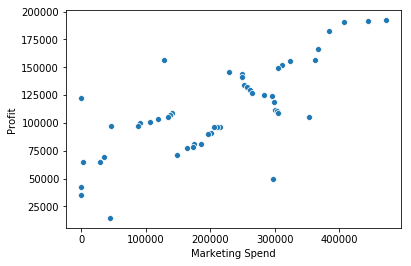

In [11]:
sb.scatterplot(dataset["Marketing Spend"],dataset["Profit"])

In [12]:
np.corrcoef(dataset["Marketing Spend"],dataset['Profit'])[0,1]

0.7477657217414767

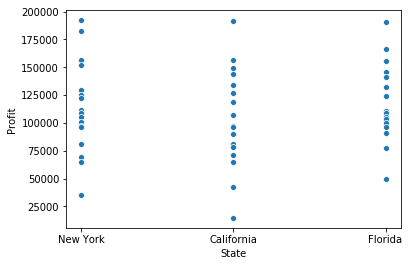

In [13]:
sb.scatterplot(dataset["State"],dataset["Profit"])

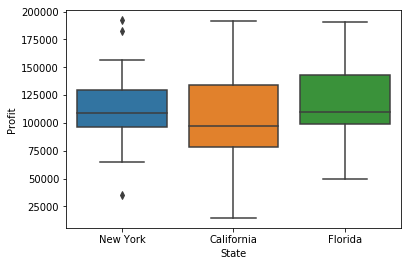

In [14]:
sb.boxplot(dataset["State"],dataset["Profit"])


In [15]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x=LabelEncoder()
x[:,3]=labelencoder_x.fit_transform(x[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
x=onehotencoder.fit_transform(x).toarray()

C:\Users\Thamesh\Anaconda3.7\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Thamesh\Anaconda3.7\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [17]:
## Avoiding the Dummy Variable Trap
x=x[:,1:]

In [18]:
##splitting dataset into train set and train test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
regression.score(x_test,y_test)

0.9347068473282446

In [21]:
y_pred=regression.predict(x_test)
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

## Backward Elimination

In [22]:
import statsmodels.formula.api as am

In [23]:
x=np.append(arr=np.ones((50,1)).astype(int), values=x, axis=1)


In [24]:
x_opt=x[:,[0,1,2,3,4,5]]

In [25]:
regression_OLS=am.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        15:37:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
x_opt=x[:,[0,1,3,4,5]]

In [27]:
regression_OLS=am.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           8.49e-29
Time:                        15:38:17   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x_opt=x[:,[0,3,4,5]]
regression_OLS=am.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        15:38:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
x_opt=x[:,[0,3,5]]
regression_OLS=am.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        15:39:17   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
x_opt=x[:,[3,5]]
x_opt

array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42],
       [131876.9 , 362861.36],
       [134615.46, 127716.82],
       [130298.13, 323876.68],
       [120542.52, 311613.29],
       [123334.88, 304981.62],
       [101913.08, 229160.95],
       [100671.96, 249744.55],
       [ 93863.75, 249839.44],
       [ 91992.39, 252664.93],
       [119943.24, 256512.92],
       [114523.61, 261776.23],
       [ 78013.11, 264346.06],
       [ 94657.16, 282574.31],
       [ 91749.16, 294919.57],
       [ 86419.7 ,      0.  ],
       [ 76253.86, 298664.47],
       [ 78389.47, 299737.29],
       [ 73994.56, 303319.26],
       [ 67532.53, 304768.73],
       [ 77044.01, 140574.81],
       [ 64664.71, 137962.62],
       [ 75328.87, 134050.07],
       [ 72107.6 , 353183.81],
       [ 66051.52, 118148.2 ],
       [ 65605.48, 107138.38],
       [ 61994.48,  91131.24],
       [ 61136.38,  88218.23],
       [